<a href="https://colab.research.google.com/github/moeghaf/Spatial-Transcriptomics-of-the-Prostate-Tumour-Matrisome/blob/main/Matrisome_category_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations 

In [1]:
!pip install ecmanalysis==0.0.18

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.0/648.0 KB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 5.3 MB/s eta 0:00:00
  Created wheel f

# Imports

In [21]:
# Import matrisome clustering tool for spatial transcriptomics 
from ecmanalysis.ST import MatriClust 
          
from sklearn.metrics.cluster import adjusted_rand_score
import os 
import pandas as pd

# Download data

In [2]:

def download_ST_data():
  ''' 
  Downloads three x10 Genomics prostate datasets - Normal, stage 3 + stage 4 
  required for the study 
  ''' 

  # Download normal dataset, unzip & place in appropriate folder  
  os.mkdir('Normal')
  !wget https://cf.10xgenomics.com/samples/spatial-exp/1.3.0/Visium_FFPE_Human_Normal_Prostate/Visium_FFPE_Human_Normal_Prostate_filtered_feature_bc_matrix.h5
  !wget  https://cf.10xgenomics.com/samples/spatial-exp/1.3.0/Visium_FFPE_Human_Normal_Prostate/Visium_FFPE_Human_Normal_Prostate_spatial.tar.gz
  !tar -xzvf /content/Visium_FFPE_Human_Normal_Prostate_spatial.tar.gz
  os.replace('spatial', 'Normal/spatial')

  # Download invasive adenocarcinoma dataset 
  os.mkdir('stage_3')
  !wget https://cf.10xgenomics.com/samples/spatial-exp/1.3.0/Visium_FFPE_Human_Prostate_Cancer/Visium_FFPE_Human_Prostate_Cancer_filtered_feature_bc_matrix.h5  
  !wget  https://cf.10xgenomics.com/samples/spatial-exp/1.3.0/Visium_FFPE_Human_Prostate_Cancer/Visium_FFPE_Human_Prostate_Cancer_spatial.tar.gz
  !tar -xzvf /content/Visium_FFPE_Human_Prostate_Cancer_spatial.tar.gz
  os.replace('spatial', 'stage_3/spatial')
  

  # Download acinar cellular carcinoma dataset 
  os.mkdir('stage_4')
  !wget https://cf.10xgenomics.com/samples/spatial-exp/1.3.0/Visium_FFPE_Human_Prostate_Acinar_Cell_Carcinoma/Visium_FFPE_Human_Prostate_Acinar_Cell_Carcinoma_filtered_feature_bc_matrix.h5
  !wget  https://cf.10xgenomics.com/samples/spatial-exp/1.3.0/Visium_FFPE_Human_Prostate_Acinar_Cell_Carcinoma/Visium_FFPE_Human_Prostate_Acinar_Cell_Carcinoma_spatial.tar.gz
  !tar -xzvf /content/Visium_FFPE_Human_Prostate_Acinar_Cell_Carcinoma_spatial.tar.gz
  os.replace('spatial', 'stage_4/spatial')

  print('\n - - - - - - - - - - - ')
  print('Downloads complete')
  print(' - - - - - - - - - - - ')
  return 

In [3]:
download_ST_data() 

--2023-01-18 14:27:29--  https://cf.10xgenomics.com/samples/spatial-exp/1.3.0/Visium_FFPE_Human_Normal_Prostate/Visium_FFPE_Human_Normal_Prostate_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9306124 (8.9M) [binary/octet-stream]
Saving to: ‘Visium_FFPE_Human_Normal_Prostate_filtered_feature_bc_matrix.h5’

Visium_FFPE_Human_N 100%[===================>]   8.88M  21.4MB/s    in 0.4s    

2023-01-18 14:27:30 (21.4 MB/s) - ‘Visium_FFPE_Human_Normal_Prostate_filtered_feature_bc_matrix.h5’ saved [9306124/9306124]

--2023-01-18 14:27:30--  https://cf.10xgenomics.com/samples/spatial-exp/1.3.0/Visium_FFPE_Human_Normal_Prostate/Visium_FFPE_Human_Normal_Prostate_spatial.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812

## Set up paths 

In [4]:
# Normal paths 
pf_norm = '/content/Normal'
cf_norm = '/content/Visium_FFPE_Human_Normal_Prostate_filtered_feature_bc_matrix.h5'

# Invasive adenocarcinoma paths 
pf_stage_3 = '/content/stage_3'
cf_stage_3 = '/content/Visium_FFPE_Human_Prostate_Cancer_filtered_feature_bc_matrix.h5'

# Acinar cellular carcinoma 
pf_stage_4 = '/content/stage_4'
cf_stage_4 = '/content/Visium_FFPE_Human_Prostate_Acinar_Cell_Carcinoma_filtered_feature_bc_matrix.h5'

cfs = [cf_norm, cf_stage_3, cf_stage_4]
pfs = [pf_norm, pf_stage_3, pf_stage_4]

# Example loading single dataset 
#mc = MatriClust (pfs[0], cfs[0], multiple_datasets=False, dataset_names='Normal')




# All genes 

In [5]:
# Load all three datasets, set up saving dir and QC
mc = MatriClust(pfs, cfs, multiple_datasets=True, dataset_names=['Norm', 'stage_3', 'stage_4'])
mc.save_settings('preprocessing')
mc.quality_control()

Loading and merging multiple datasets 


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


Image results will be saved in preprocessing_figures folder
calculating QC metrics 
Removal of genes based on % mitochondrial 


/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


### Correct batch effect

------------------------------------------
Datasets BEFORE batch effect correction
         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


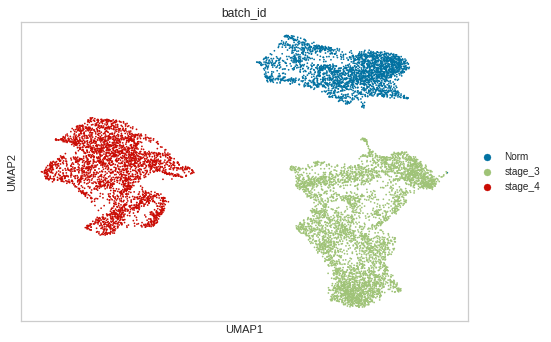

------------------------------------------
Datasets AFTER batch effect correction


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


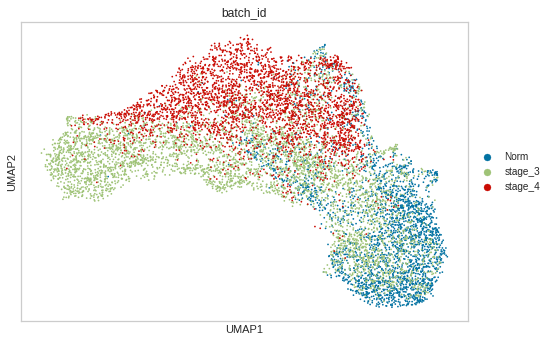

In [6]:
mc.correct_batch_effect()

### Set up save directory 

In [7]:
mc.save_settings('all_genes')

Image results will be saved in all_genes_figures folder


### Cluster all datasets together and visualize

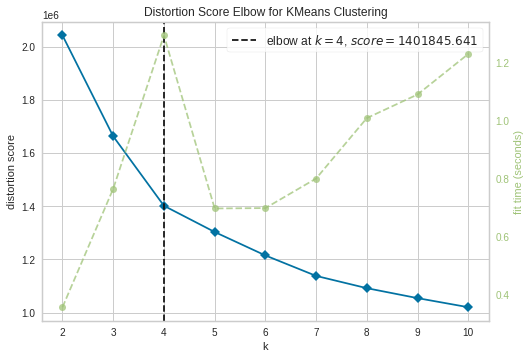

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


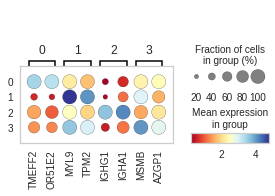

In [8]:
mc.cluster(all_genes=True)

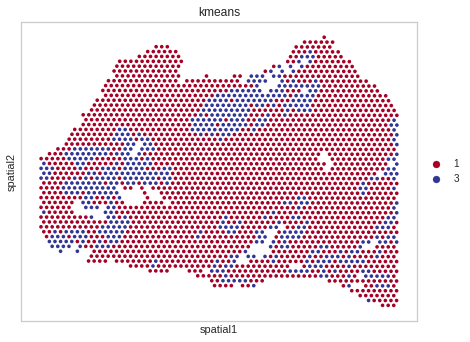

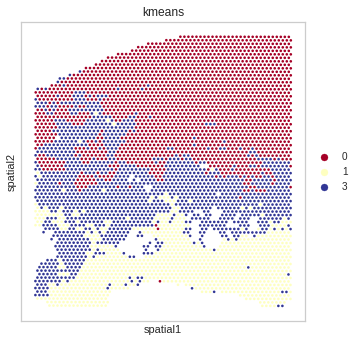

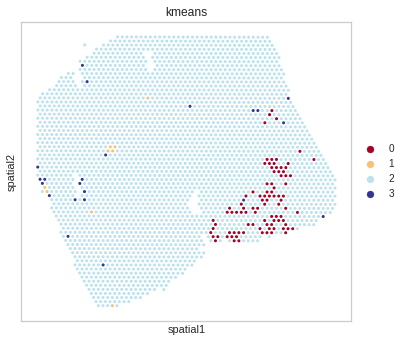

In [9]:
mc.visualize_clusters()

# Full matrisome 

matrisome data already available
Loading and merging multiple datasets 


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


Image results will be saved in full_matrisome_figures folder
calculating QC metrics 
Removal of genes based on % mitochondrial 


/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Full matrisome detected:  808 / 1068


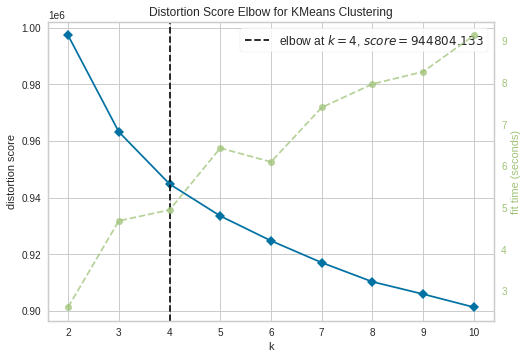

/usr/local/lib/python3.8/dist-packages/ecmanalysis/ST.py:152: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.adata.obs['kmeans'] = km.labels_.astype(str)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


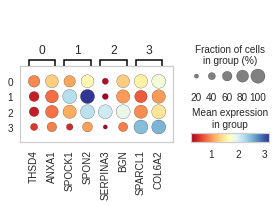

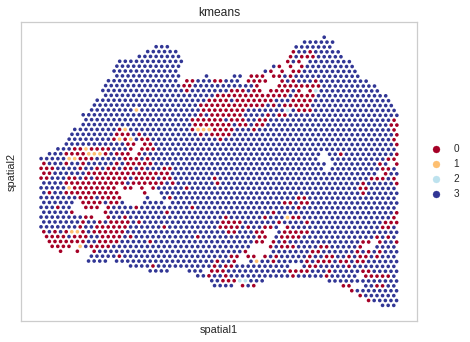

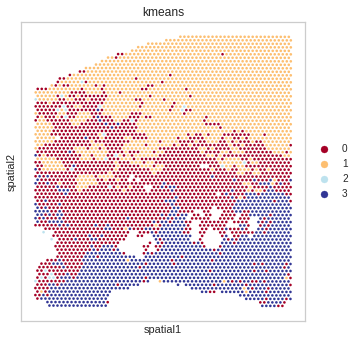

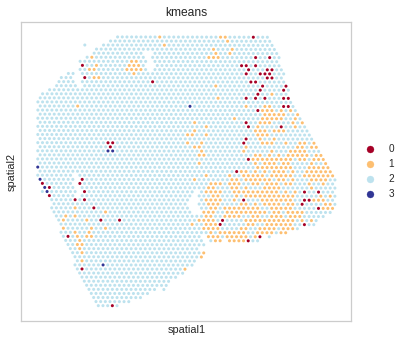

In [10]:
# Load all three datasets 
mc_full = MatriClust(pfs, cfs, multiple_datasets=True, dataset_names=['Norm', 'stage_3', 'stage_4'])
mc_full.save_settings('full_matrisome')
mc_full.quality_control()
mc_full.filter_matrisome('Full matrisome')
mc_full.cluster(all_genes=False)
mc_full.visualize_clusters()

# Collagens

matrisome data already available
Loading and merging multiple datasets 


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


Image results will be saved in collagens_figures folder
calculating QC metrics 
Removal of genes based on % mitochondrial 


/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Collagens detected:  43 / 44


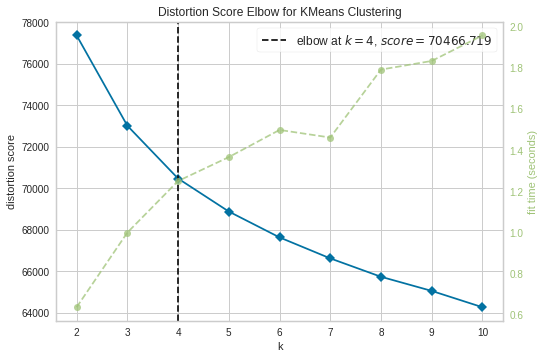

/usr/local/lib/python3.8/dist-packages/ecmanalysis/ST.py:152: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.adata.obs['kmeans'] = km.labels_.astype(str)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


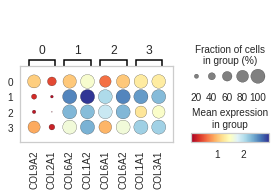

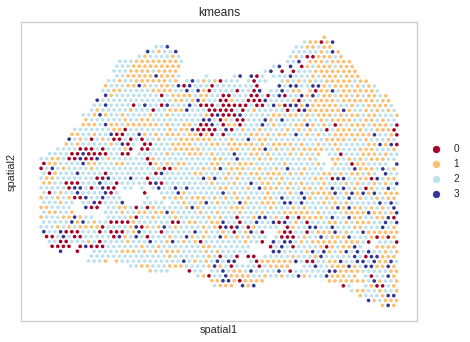

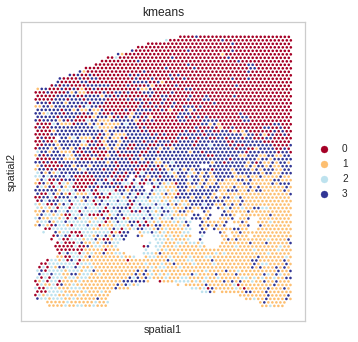

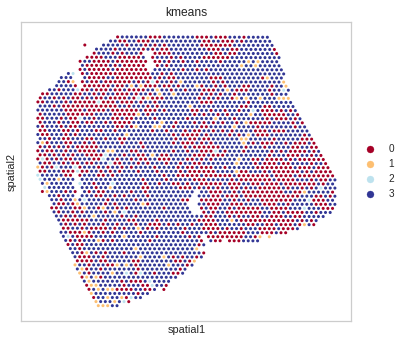

In [11]:
mc_col = MatriClust (pfs, cfs, multiple_datasets=True, dataset_names=['Norm', 'stage_3', 'stage_4'])
mc_col.save_settings('collagens')
mc_col.quality_control()
mc_col.filter_matrisome('Collagens')
mc_col.cluster(all_genes=False)
mc_col.visualize_clusters()

# Regulators

matrisome data already available
Loading and merging multiple datasets 


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


Image results will be saved in Regulators_figures folder
calculating QC metrics 
Removal of genes based on % mitochondrial 


/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


ECM Regulators detected:  188 / 238


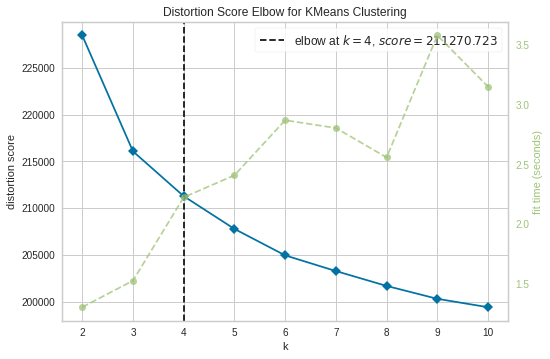

/usr/local/lib/python3.8/dist-packages/ecmanalysis/ST.py:152: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.adata.obs['kmeans'] = km.labels_.astype(str)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


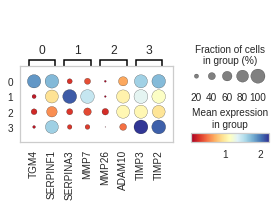

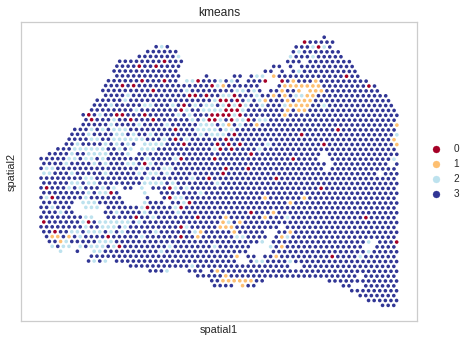

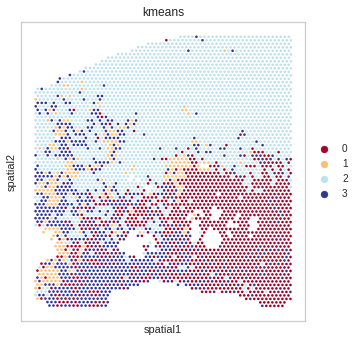

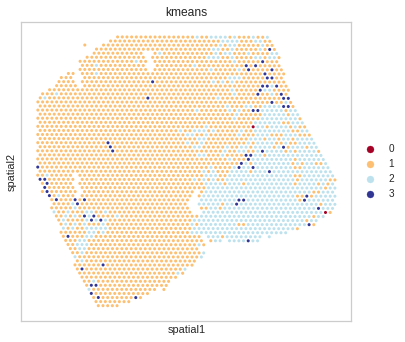

In [12]:
mc_reg = MatriClust (pfs, cfs, multiple_datasets=True, dataset_names=['Norm', 'stage_3', 'stage_4'])
mc_reg.save_settings('Regulators')
mc_reg.quality_control()
mc_reg.filter_matrisome('ECM Regulators')
mc_reg.cluster(all_genes=False)
mc_reg.visualize_clusters()

# Glycoproteins 

matrisome data already available
Loading and merging multiple datasets 


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


Image results will be saved in Glycoproteins_figures folder
calculating QC metrics 
Removal of genes based on % mitochondrial 


/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


ECM Glycoproteins detected:  159 / 195


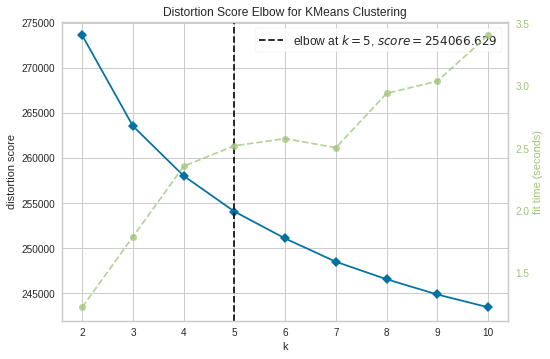

/usr/local/lib/python3.8/dist-packages/ecmanalysis/ST.py:152: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.adata.obs['kmeans'] = km.labels_.astype(str)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


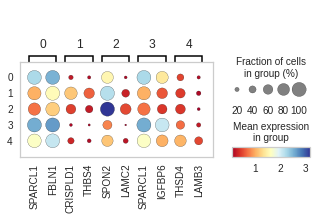

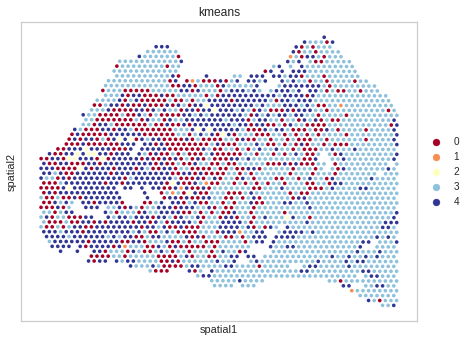

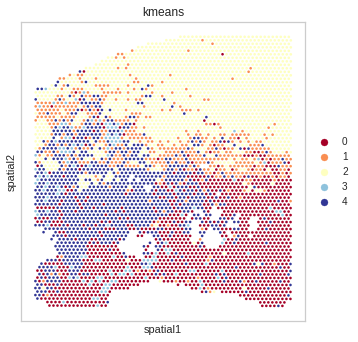

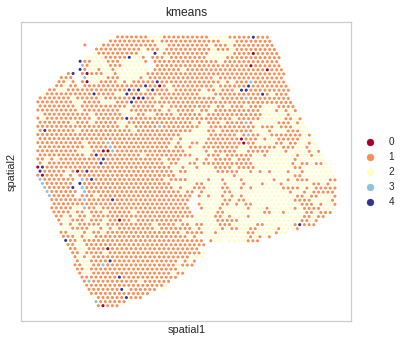

In [13]:
mc_gp = MatriClust (pfs, cfs, multiple_datasets=True, dataset_names=['Norm', 'stage_3', 'stage_4'])
mc_gp.save_settings('Glycoproteins')
mc_gp.quality_control()
mc_gp.filter_matrisome('ECM Glycoproteins')
mc_gp.cluster(all_genes=False)
mc_gp.visualize_clusters()

# Proteoglycans

matrisome data already available
Loading and merging multiple datasets 


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


Image results will be saved in Proteoglycans_figures folder
calculating QC metrics 
Removal of genes based on % mitochondrial 


/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Proteoglycans detected:  30 / 35


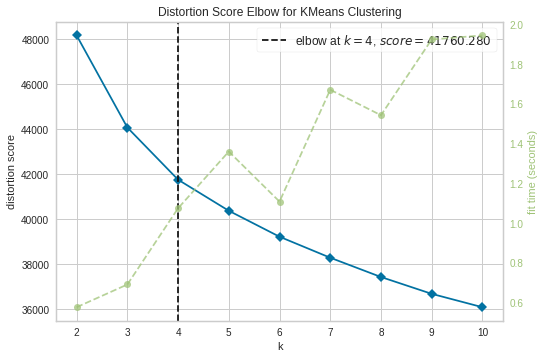

/usr/local/lib/python3.8/dist-packages/ecmanalysis/ST.py:152: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.adata.obs['kmeans'] = km.labels_.astype(str)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


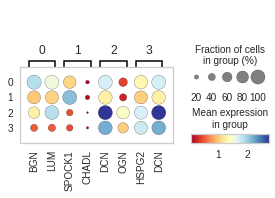

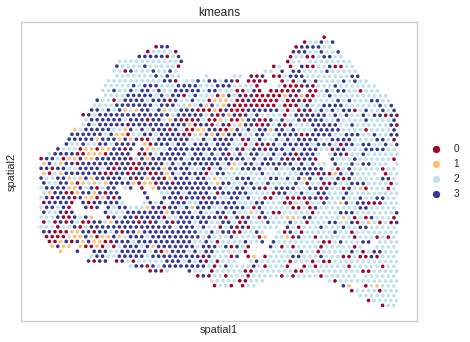

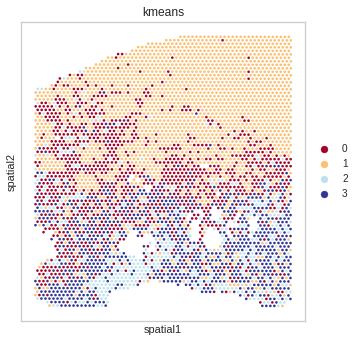

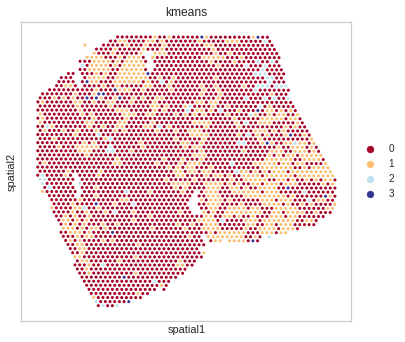

In [14]:
mc_pg = MatriClust (pfs, cfs, multiple_datasets=True, dataset_names=['Norm', 'stage_3', 'stage_4'])
mc_pg.save_settings('Proteoglycans')
mc_pg.quality_control()
mc_pg.filter_matrisome('Proteoglycans')
mc_pg.cluster(all_genes=False)
mc_pg.visualize_clusters()

# Affiliated 

matrisome data already available
Loading and merging multiple datasets 


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


Image results will be saved in Affiliated_figures folder
calculating QC metrics 
Removal of genes based on % mitochondrial 


/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


ECM-affiliated Proteins detected:  134 / 171


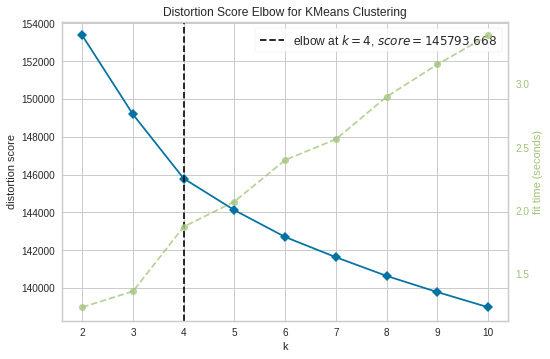

/usr/local/lib/python3.8/dist-packages/ecmanalysis/ST.py:152: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.adata.obs['kmeans'] = km.labels_.astype(str)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


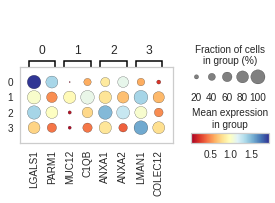

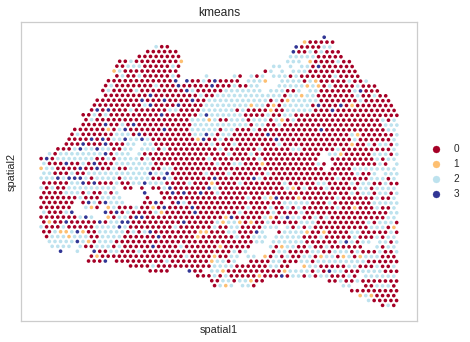

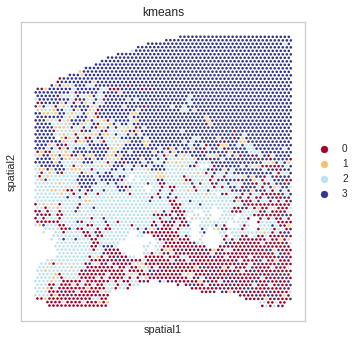

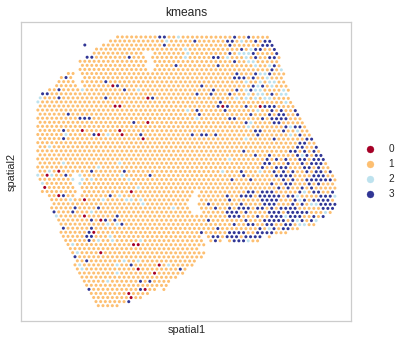

In [15]:
mc_aff = MatriClust (pfs, cfs, multiple_datasets=True, dataset_names=['Norm', 'stage_3', 'stage_4'])
mc_aff.save_settings('Affiliated')
mc_aff.quality_control()
mc_aff.filter_matrisome('ECM-affiliated Proteins')
mc_aff.cluster(all_genes=False)
mc_aff.visualize_clusters()

# Secreted factors 

matrisome data already available
Loading and merging multiple datasets 


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


Image results will be saved in Secreted factors_figures folder
calculating QC metrics 
Removal of genes based on % mitochondrial 


/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Secreted Factors detected:  254 / 344


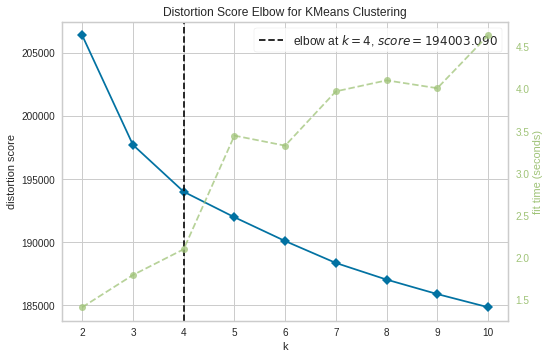

/usr/local/lib/python3.8/dist-packages/ecmanalysis/ST.py:152: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.adata.obs['kmeans'] = km.labels_.astype(str)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


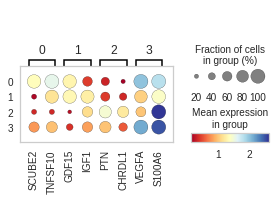

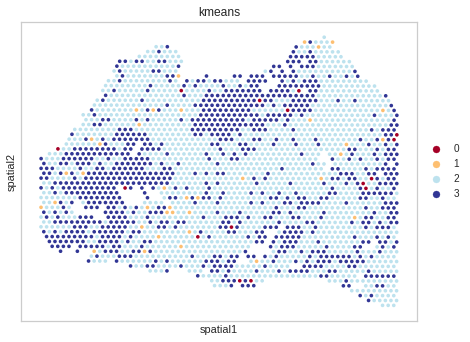

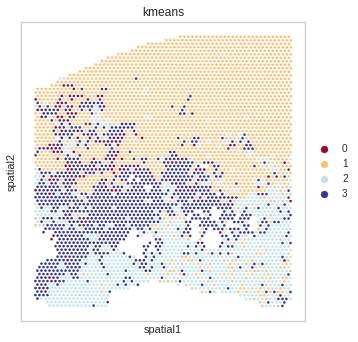

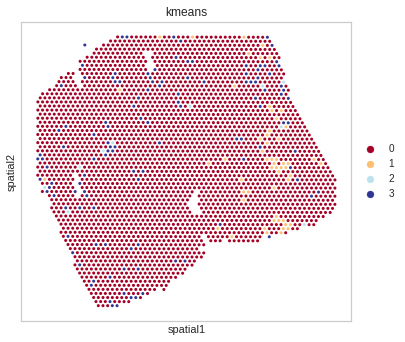

In [16]:
mc_sf = MatriClust (pfs, cfs, multiple_datasets=True, dataset_names=['Norm', 'stage_3', 'stage_4'])
mc_sf.save_settings('Secreted factors')
mc_sf.quality_control()
mc_sf.filter_matrisome('Secreted Factors')
mc_sf.cluster(all_genes=False)
mc_sf.visualize_clusters()

# Cluster similarities between full matrisome to all genes clusters and each category to all genes 

In [19]:
def calculate_similarities(dataset):
  all_genes = mc.adata_dict[dataset].obs['kmeans'].values
  full = mc_full.adata_dict[dataset].obs['kmeans'].values
  col = mc_col.adata_dict[dataset].obs['kmeans'].values
  gp = mc_gp.adata_dict[dataset].obs['kmeans'].values
  pg = mc_pg.adata_dict[dataset].obs['kmeans'].values
  aff = mc_aff.adata_dict[dataset].obs['kmeans'].values
  reg = mc_reg.adata_dict[dataset].obs['kmeans'].values
  sf = mc_sf.adata_dict[dataset].obs['kmeans'].values

  cluster_labels = [full, col, gp, pg, aff, reg, sf]
  names = ['full matrisome', 'collagens', 'glycoproteins', 
           'proteoglycans', 'affiliated', ' regulators', 'secreted factors']
  data = []
  print('Similarity of clusters to all gene clusters: ')
  for i in range(len(cluster_labels)):
    sim = adjusted_rand_score(all_genes, cluster_labels[i])
    #print('Similarity between all genes and ', names[i], ' = ', sim)
    data.append(sim)
  df = pd.DataFrame((data),columns=[dataset], index=names)
  return df 

In [22]:
norm_df = calculate_similarities(dataset='Norm')
norm_df

Similarity of clusters to all gene clusters: 


Norm
full matrisome    0.766504
collagens         0.124874
glycoproteins     0.162078
proteoglycans     0.115092
affiliated        0.425185
 regulators       0.295936
secreted factors  0.357687

In [23]:
calculate_similarities(dataset='stage_3')

Similarity of clusters to all gene clusters: 


stage_3
full matrisome    0.622608
collagens         0.322280
glycoproteins     0.463733
proteoglycans     0.424899
affiliated        0.534581
 regulators       0.455125
secreted factors  0.530412

In [24]:
calculate_similarities(dataset='stage_4')

Similarity of clusters to all gene clusters: 


stage_4
full matrisome    0.281190
collagens         0.044411
glycoproteins     0.121216
proteoglycans     0.128212
affiliated        0.184138
 regulators       0.141663
secreted factors  0.223507